In [ ]:
import matplotlib.pyplot as plt

from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.time import parse_time
from sunpy.timeseries import TimeSeries

In [ ]:
tr = a.Time("2011-06-07 04:00", "2011-06-07 12:00")
results = Fido.search(
    tr,
    a.Instrument.xrs & a.goes.SatelliteNumber(15) & a.Resolution("avg1m")
    | a.hek.FL & (a.hek.FRM.Name == "SWPC"),
)  # NOQA

In [ ]:
files = Fido.fetch(results)
goes = TimeSeries(files)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g15_d20110607_v1-0-0.nc:   0%|          | 0.00/976k [00:00<?, ?B/s]

In [ ]:
hek_results = results["hek"]
flares_hek = hek_results[0]

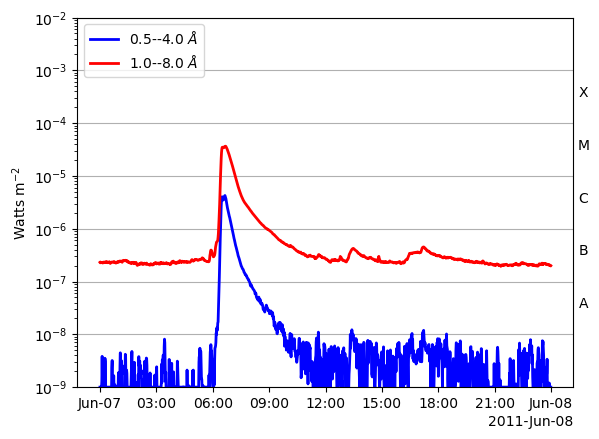

In [ ]:
fig, ax = plt.subplots()
goes.plot(axes=ax)
# ax.axvline(parse_time(flares_hek['event_peaktime']).datetime)
# ax.axvspan(
#     parse_time(flares_hek['event_starttime']).datetime,
#     parse_time(flares_hek['event_endtime']).datetime,
#     alpha=0.2, label=flares_hek['fl_goescls']
# )
ax.legend(loc=2)
ax.set_yscale("log")

plt.show()

In [ ]:
goes.meta["xrsa"]

TypeError: 'TimeSeriesMetaData' object is not subscriptable

In [ ]:
goes.units["xrsa"]

Unit("W / m2")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sunpy.time import parse_time

In [ ]:
time_array = parse_time(goes.to_dataframe().index)

In [ ]:
goes_data = pd.DataFrame(
    {"xrsa": np.array(goes.to_dataframe()["xrsa"])}, index=time_array.datetime
)

In [ ]:
from astropy import units as u

In [ ]:
units = dict([("xrsa", u.W / u.m**2)])

In [ ]:
meta = dict(
    {"instrument": "GOES X-ray sensor", "measurements": "primary", "type": "quicklook"}
)

In [ ]:
goes_ts = TimeSeries(goes_data, meta, units)

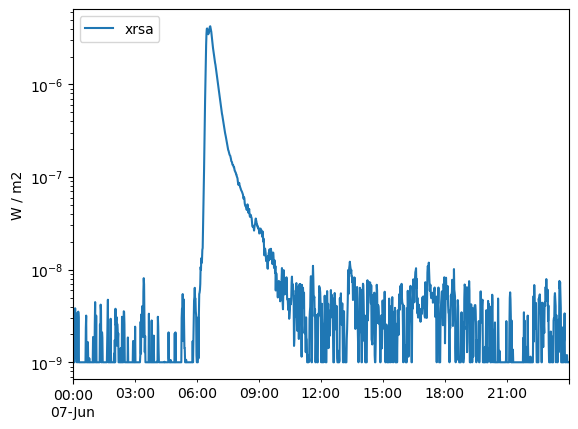

In [ ]:
fig, ax = plt.subplots()
goes_ts.plot(axes=ax)
ax.legend(loc=2)
ax.set_yscale("log")

plt.show()

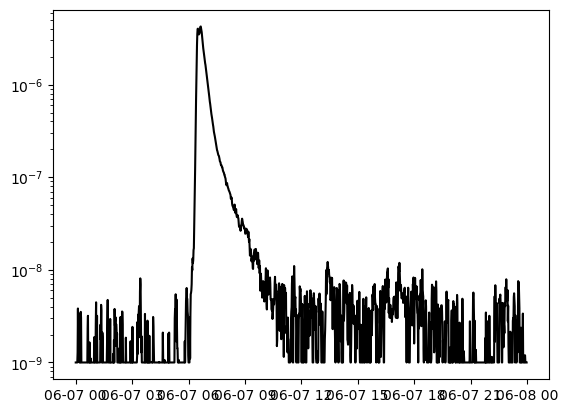

In [ ]:
fig, ax = plt.subplots()
goes_long = goes.to_dataframe()["xrsa"]
ax.plot(goes_long.index, np.array(goes_long), color="black")
ax.set_yscale("log")

plt.show()